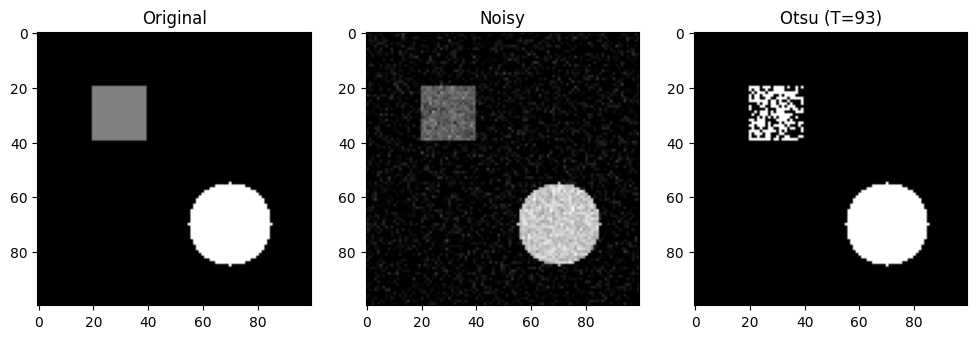

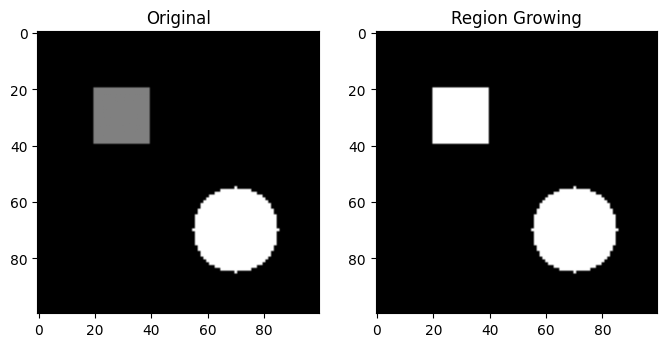

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Task 1: Otsu's Thresholding with Gaussian Noise
def create_synthetic_image():
    # Create a 100x100 image with background (0), object 1 (100), object 2 (200)
    img = np.zeros((100, 100), dtype=np.uint8)
    # Object 1: Rectangle
    img[20:40, 20:40] = 100
    # Object 2: Circle
    cv2.circle(img, (70, 70), 15, 200, -1)
    return img

def add_gaussian_noise(img, mean=0, sigma=20):
    # Add Gaussian noise
    noise = np.random.normal(mean, sigma, img.shape).astype(np.float32)
    noisy_img = img.astype(np.float32) + noise
    # Clip to [0, 255] and convert to uint8
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

def otsu_threshold(img):
    # Compute histogram
    hist, bins = np.histogram(img.ravel(), 256, [0, 256])
    hist = hist.astype(float)
    total_pixels = img.size

    # Initialize variables
    max_variance = 0
    threshold = 0

    # Compute cumulative sums
    cumsum = np.cumsum(hist)
    cumsum_intensity = np.cumsum(hist * np.arange(256))

    for t in range(1, 256):
        # Background and foreground weights
        w_b = cumsum[t]
        w_f = total_pixels - w_b
        if w_b == 0 or w_f == 0:
            continue

        # Background and foreground means
        mean_b = cumsum_intensity[t] / w_b
        mean_f = (cumsum_intensity[-1] - cumsum_intensity[t]) / w_f

        # Between-class variance
        variance = w_b * w_f * (mean_b - mean_f) ** 2

        if variance > max_variance:
            max_variance = variance
            threshold = t

    # Apply threshold
    segmented = (img > threshold).astype(np.uint8) * 255
    return segmented, threshold

# Task 2: Region-Growing Segmentation
def region_growing(img, seeds, threshold=10):
    # Initialize output and visited arrays
    segmented = np.zeros_like(img, dtype=np.uint8)
    visited = np.zeros_like(img, dtype=bool)
    rows, cols = img.shape

    # Define 4-connectivity
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Process each seed
    for seed in seeds:
        queue = [seed]
        seed_value = img[seed]
        segmented[seed] = 255
        visited[seed] = True

        while queue:
            current = queue.pop(0)
            current_value = img[current]

            # Check neighbors
            for dr, dc in neighbors:
                r, c = current[0] + dr, current[1] + dc
                if 0 <= r < rows and 0 <= c < cols and not visited[r, c]:
                    if abs(int(img[r, c]) - int(seed_value)) <= threshold:
                        queue.append((r, c))
                        segmented[r, c] = 255
                        visited[r, c] = True

    return segmented

# Main execution
if __name__ == "__main__":
    # Task 1
    original_img = create_synthetic_image()
    noisy_img = add_gaussian_noise(original_img)
    segmented_otsu, thresh_value = otsu_threshold(noisy_img)

    # Visualize Task 1
    plt.figure(figsize=(12, 4))
    plt.subplot(131), plt.imshow(original_img, cmap='gray'), plt.title('Original')
    plt.subplot(132), plt.imshow(noisy_img, cmap='gray'), plt.title('Noisy')
    plt.subplot(133), plt.imshow(segmented_otsu, cmap='gray'), plt.title(f'Otsu (T={thresh_value})')
    plt.show()

    ############################################################################

    # Task 2
    seeds = [(25, 25), (70, 70)]  # Seeds for object 1 and object 2
    segmented_region = region_growing(original_img, seeds)

    # Visualize Task 2
    plt.figure(figsize=(8, 4))
    plt.subplot(121), plt.imshow(original_img, cmap='gray'), plt.title('Original')
    plt.subplot(122), plt.imshow(segmented_region, cmap='gray'), plt.title('Region Growing')
    plt.show()